# Data Science Interview Assignment

smesh.bhungane@gmail.com

In [259]:
# import libraries
import pandas as pd
import numpy as np
 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [260]:
# load excel file
df = pd.read_excel("pone.0212445.s004 - Copy.xlsx", sheet_name = 'estimates')

S4 Table.  Direct survey domain and "Fay-Heriott" small area estimates of HIV prevalence and the numbers of people living with HIV (NoPLHIV) in the districts of South Africa obtained from Model 3.  LCL and UCL denotes the lower and upper limits, respectively, of 95% confidence intervals.

In [261]:
# fisrt five rows
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [262]:
# print the column names of the dastaframes
print("data:\n{}".format(df.columns))

data:
Index(['District', 'Code', 'Estimate', 'Prevalence_%', 'Prevalence_LCL',
       'Prevalence_UCL', 'NoPLHIV', 'NoPLHIV_LCL', 'NoPLHIV_UCL'],
      dtype='object')


In [263]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


In [264]:
# dataset rows and columns
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  104
Columns  :  9

Missing values :   0


In [265]:
# counting unique districts
df['District'].nunique()

52

In [266]:
# descriptive statistics
df.describe()

,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,12.113805,8.507655,16.142182,123914.230769,89210.009615,162458.317308
std,4.978586,4.635330,6.055076,115469.372356,89791.909524,145761.963447
min,1.584032,0.000000,2.998406,1876.000000,0.000000,3552.000000
25%,8.869829,4.911882,12.301325,46667.500000,28057.750000,68507.750000
50%,11.750000,8.165653,15.935119,99751.500000,69407.500000,136812.000000
75%,15.718785,11.617805,19.378361,146335.500000,115101.250000,181302.250000
max,25.000000,18.218028,40.945994,515387.000000,408472.000000,660996.000000


In [267]:
# counting Estimate
df['Estimate'].value_counts(normalize=True) 

Survey         0.5
Fay-Heriott    0.5
Name: Estimate, dtype: float64

''

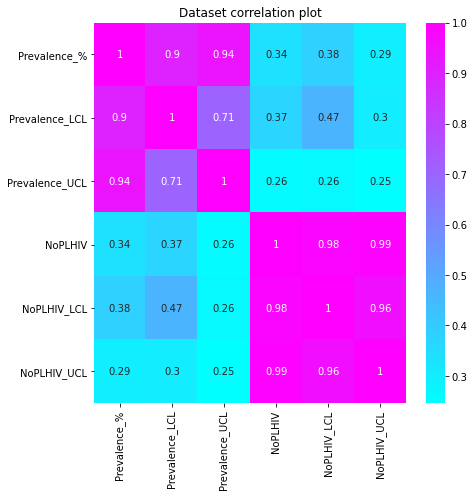

In [268]:
# correlation plot
f, ax = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.title('Dataset correlation plot') 
,

a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

In [269]:
df.groupby('Estimate')['NoPLHIV'].agg('sum')

Estimate
Fay-Heriott    6477177
Survey         6409903
Name: NoPLHIV, dtype: int64

In [270]:
df.groupby(["Estimate", "District"])['NoPLHIV'].sum()

Estimate     District         
Fay-Heriott  Alfred Nzo           105145
             Amajuba               81010
             Amatole              106783
             Bojanala Platinum    212727
             Buffalo City         101693
                                   ...  
Survey       uMgungundlovu        221073
             uMkhanyakude          86131
             uMzinyathi            93587
             uThukela             118124
             uThungulu            162238
Name: NoPLHIV, Length: 104, dtype: int64

**Survey estimate shows that the total number of 6409903  people are living with HIV (NoPLHIV) in the listed districts**

b) What is the average NoPLHIV of the two estimates used for “Xhariep”?

In [271]:
df.groupby('Estimate')['NoPLHIV'].agg('mean')

Estimate
Fay-Heriott    124561.096154
Survey         123267.365385
Name: NoPLHIV, dtype: float64

In [272]:
df[df['District']=='Xhariep'].groupby('Estimate')['NoPLHIV'].agg('mean')

Estimate
Fay-Heriott    12718
Survey         11777
Name: NoPLHIV, dtype: int64

c) Add a column and populate it with the number of people not living with HIV for each row.

**Prevalence** is noted to be number of people living withe the certain medical condition, to calculate Non prevalence in percentage will be 

**Non_Prevalence% = 100 - Prevalence_%**

In [273]:
df['Non_Prevalence%'] = 100 - df['Prevalence_%'] 
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Non_Prevalence%
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,86.400000
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,86.498717
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,94.800000
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,93.979957
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,97.300000


d) What is the total NoPLHIV in all the cities (districts with “city” or “metro” in the name)

In [274]:
df[df['District'].str.contains('City|Metro')]

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Non_Prevalence%
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,86.400000
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,86.498717
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,94.800000
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,93.979957
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,88.900000
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,88.924694
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,91.700000
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,90.945940
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,88.300000
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,88.975142


In [275]:
# total NoPLHIV in all the cities (city , metro)
df[df['District'].str.contains('City|Metro')].sum()

District           Buffalo CityBuffalo CityCity of Cape TownCity ...
Code                                  BUFBUFCPTCPTJHBJHBNMANMATSHTSH
Estimate           SurveyFay-HeriottSurveyFay-HeriottSurveyFay-He...
Prevalence_%                                               100.57555
Prevalence_LCL                                             70.575418
Prevalence_UCL                                            134.124617
NoPLHIV                                                      2572733
NoPLHIV_LCL                                                  1817007
NoPLHIV_UCL                                                  3417250
Non_Prevalence%                                            899.42445
dtype: object

3.

4.Using matplotlib, plot each Prevalence confidence interval (Prevalence_UCL and Prevalence_LCL) for Districts that end in “i”; according to Fay-Herriott estimates on 1 graph. 

In [276]:
# string to be searched in end of string 
search ="i"
  
# boolean data frame
df2 = df["District"].str.lower().str.endswith(search)
  
# creating filtered data frame
df_i = df[df2] 

In [277]:
# filtered data frame by estimate
df_ii = df_i.loc[df['Estimate'] == 'Fay-Heriott']

In [278]:
# view data frame with only district name ending 'i'
df_ii.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Non_Prevalence%
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224,85.919017
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013,88.492196
25,Fezile Dabi,DC20,Fay-Heriott,10.030754,7.811309,12.793304,50767,39534,64748,89.969246
33,uMzinyathi,DC24,Fay-Heriott,18.097578,16.845087,19.421445,93061,86620,99868,81.902422
51,Ehlanzeni,DC32,Fay-Heriott,15.820960,12.012425,20.554906,271179,205899,352321,84.179040


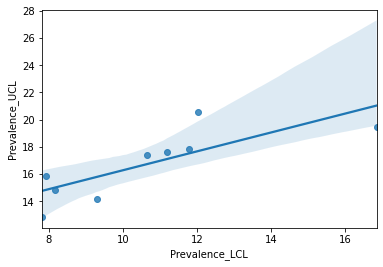

In [279]:
# create random data
x = df_ii['Prevalence_LCL']
y = df_ii['Prevalence_UCL']
  
# create regression plot with confidence interval of 95
ax = sns.regplot(x, y, ci=95)

                                        # Thank you